# Mengimport Library yang akan digunakan

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score,calinski_harabasz_score
from sklearn.metrics import adjusted_rand_score

# Read file CSV

In [61]:
df = pd.read_csv('large_data.csv')

<h1><b>Analisis Data</b></h1>

In [62]:
df.head()

,COUGH,MUSCLE_ACHES,TIREDNESS,SORE_THROAT,RUNNY_NOSE,STUFFY_NOSE,FEVER,NAUSEA,VOMITING,DIARRHEA,...,DIFFICULTY_BREATHING,LOSS_OF_TASTE,LOSS_OF_SMELL,ITCHY_NOSE,ITCHY_EYES,ITCHY_MOUTH,ITCHY_INNER_EAR,SNEEZING,PINK_EYE,TYPE
0,0,0,1,0,1,0,0,0,0,0,...,0,1,0,1,0,0,1,0,1,ALLERGY
1,0,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,1,1,1,1,ALLERGY
2,0,1,1,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,ALLERGY
3,0,0,0,1,1,0,0,0,0,0,...,0,1,1,0,0,1,0,1,1,ALLERGY
4,0,0,1,0,1,0,0,0,0,0,...,0,1,1,0,1,0,1,1,1,ALLERGY


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44453 entries, 0 to 44452
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   COUGH                 44453 non-null  int64 
 1   MUSCLE_ACHES          44453 non-null  int64 
 2   TIREDNESS             44453 non-null  int64 
 3   SORE_THROAT           44453 non-null  int64 
 4   RUNNY_NOSE            44453 non-null  int64 
 5   STUFFY_NOSE           44453 non-null  int64 
 6   FEVER                 44453 non-null  int64 
 7   NAUSEA                44453 non-null  int64 
 8   VOMITING              44453 non-null  int64 
 9   DIARRHEA              44453 non-null  int64 
 10  SHORTNESS_OF_BREATH   44453 non-null  int64 
 11  DIFFICULTY_BREATHING  44453 non-null  int64 
 12  LOSS_OF_TASTE         44453 non-null  int64 
 13  LOSS_OF_SMELL         44453 non-null  int64 
 14  ITCHY_NOSE            44453 non-null  int64 
 15  ITCHY_EYES            44453 non-null

<h4><b>Cek apakah ada nilai Null</b></h4>

In [64]:
print("Jumlah nilai Null :\n")
print(df.isnull().sum())

Jumlah nilai Null :

COUGH                   0
MUSCLE_ACHES            0
TIREDNESS               0
SORE_THROAT             0
RUNNY_NOSE              0
STUFFY_NOSE             0
FEVER                   0
NAUSEA                  0
VOMITING                0
DIARRHEA                0
SHORTNESS_OF_BREATH     0
DIFFICULTY_BREATHING    0
LOSS_OF_TASTE           0
LOSS_OF_SMELL           0
ITCHY_NOSE              0
ITCHY_EYES              0
ITCHY_MOUTH             0
ITCHY_INNER_EAR         0
SNEEZING                0
PINK_EYE                0
TYPE                    0
dtype: int64


<h4><b>Cek apakah ada nilai duplikat</b></h4>

In [65]:
print("total nilai duplikat : ")
df.duplicated().sum()

total nilai duplikat : 


0

# A.Supervised Learning

<h2><b>A1 KLASIFIKASI</b></h2>

In [66]:
X = df[['COUGH','MUSCLE_ACHES','TIREDNESS','SORE_THROAT','RUNNY_NOSE','STUFFY_NOSE','FEVER','NAUSEA','VOMITING',
        'DIARRHEA','SHORTNESS_OF_BREATH','DIFFICULTY_BREATHING','LOSS_OF_TASTE','LOSS_OF_SMELL','ITCHY_NOSE','ITCHY_EYES','ITCHY_MOUTH','ITCHY_INNER_EAR','SNEEZING','PINK_EYE']]
y = df['TYPE']

deklarasi variabeel x untuk menampung fitur, dan variabel y untuk menyimpan target

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

membagi dataset menjadi 2, yaitu set, yaitu set untuk melatih model (train), dan set untuk menguji performa model (test)

<h4><b>Scaling</b></h4>

In [68]:
mm = MinMaxScaler()
X_train = mm.fit_transform(X_train)
X_test = mm.transform(X_test)

In [69]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

mengubah label kategorikal ke dalam bentuk yang dapat dimengerti machine learning

<h4><b>Support Vector Machine (SVM)</b></h4>

In [70]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

SVC(kernel='linear')

Training menggunakan model SVM

<h2><b>A2.Hasil Prediksi</b></h2>

In [71]:
y_pred = svm.predict(X_test)
sv = svm.support_vectors_

membuat variabel untuk prediksi model svm

<h4><b>Confussion Matrix</b></h4>

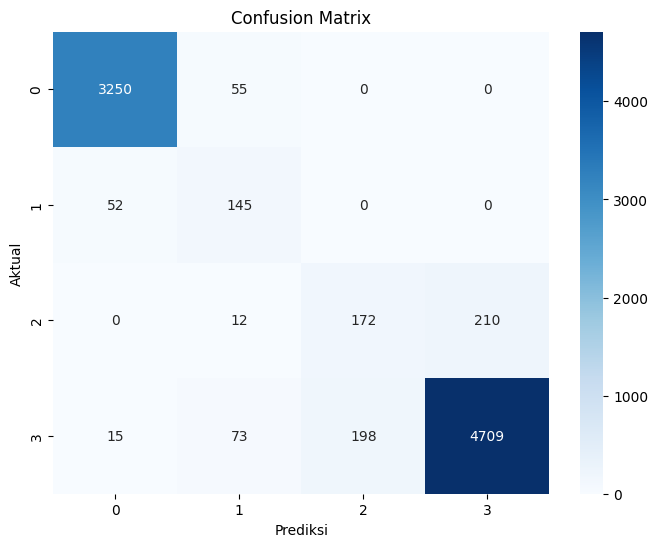

In [131]:
cm = confusion_matrix(y_test, y_pred)

# Visualisasi Confusion Matrix dengan Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()

In [73]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.9308289281295692
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3305
           1       0.51      0.74      0.60       197
           2       0.46      0.44      0.45       394
           3       0.96      0.94      0.95      4995

    accuracy                           0.93      8891
   macro avg       0.73      0.77      0.75      8891
weighted avg       0.93      0.93      0.93      8891



hasil akurasi dari model

<h2><b>A3.Plot hasil Prediksi</b></h2>

<h4><b>Scatter Plot</b></h4>

c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

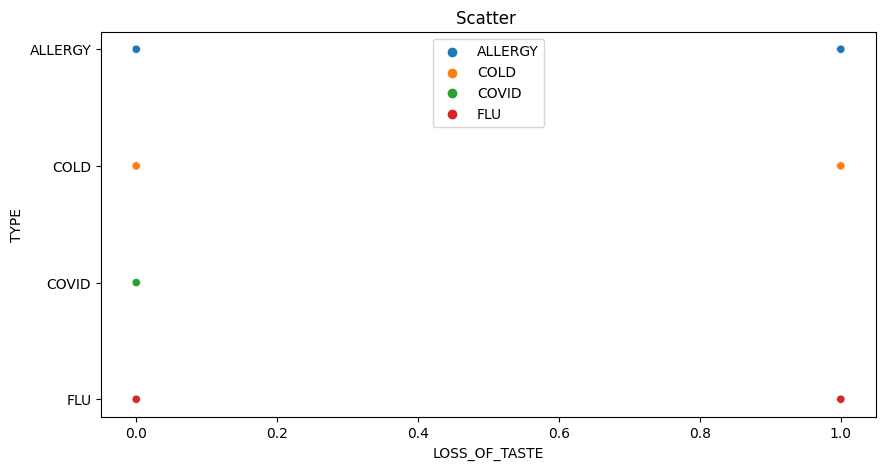

In [109]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['LOSS_OF_TASTE'], y=df['TYPE'], hue='TYPE', data=df)
plt.legend(loc='upper center')
plt.title('Scatter ')
plt.show()

data saling berhubungan dengan kolom TYPE, sisanya hubungan nya kurang atau bahkan tidak ada. oleh karena itu label y saya gunakan "TYPE"

# B.Unsupervised Learning

<h2><b>B1.Implementasikan metode K-Means</b></h2>

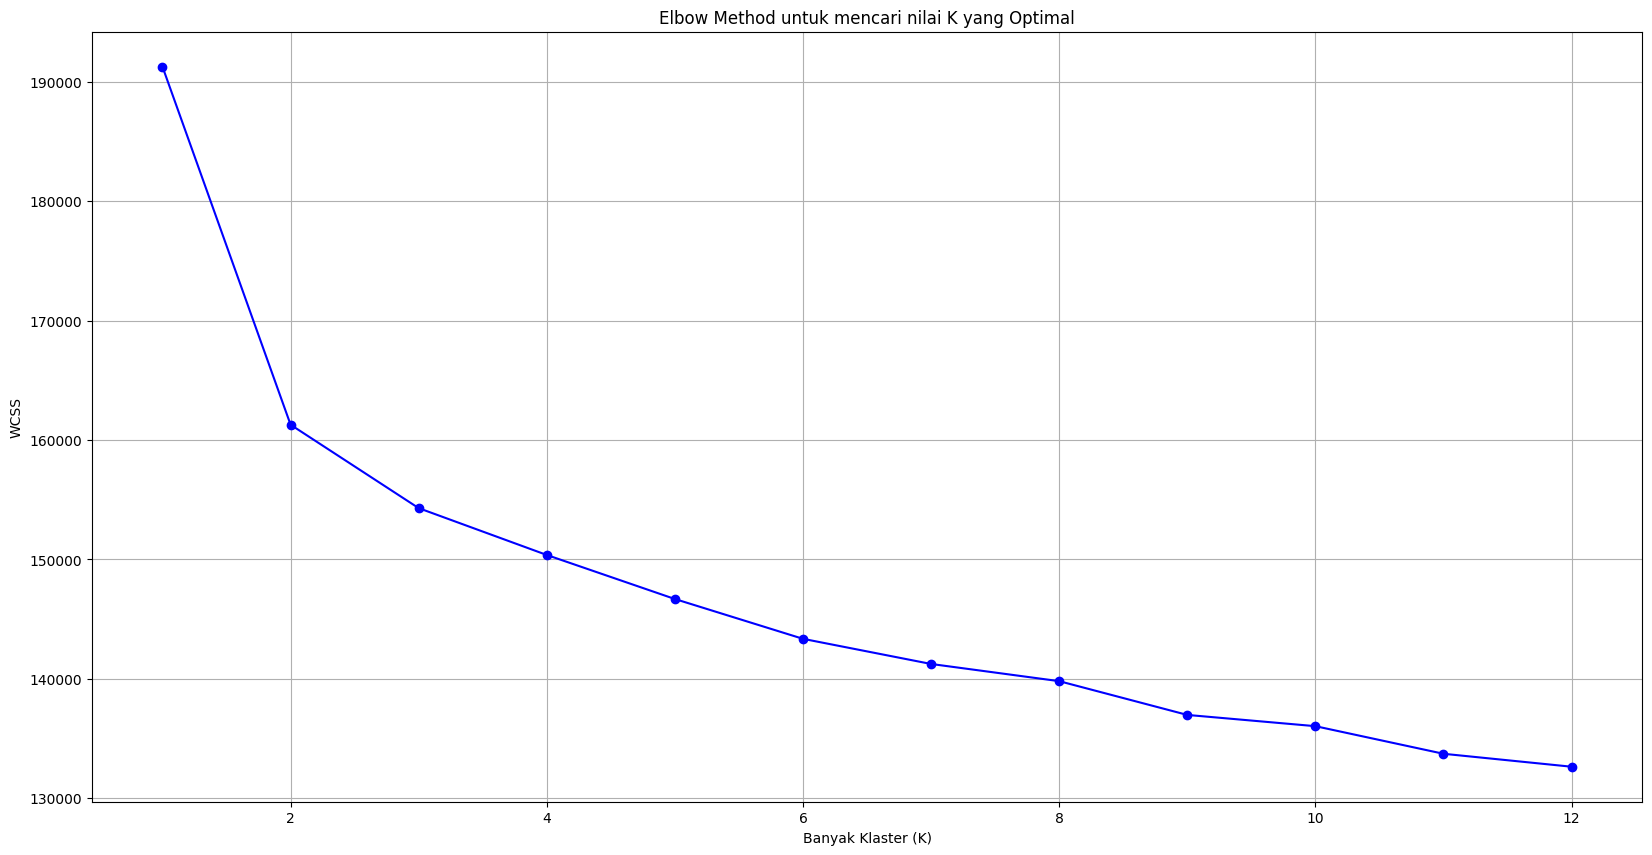

In [104]:
X = df.select_dtypes(['int64' , 'float64']).values
wcss = []

for k in range(1, 13):
    model = KMeans(n_clusters=k, n_init=10, random_state=0)
    model.fit(X)
    wcss.append(model.inertia_)

plt.figure(figsize=(20, 10))
plt.plot(range(1, 13), wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method untuk mencari nilai K yang Optimal')
plt.xlabel('Banyak Klaster (K)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

mencari nilai k yang optimal

c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

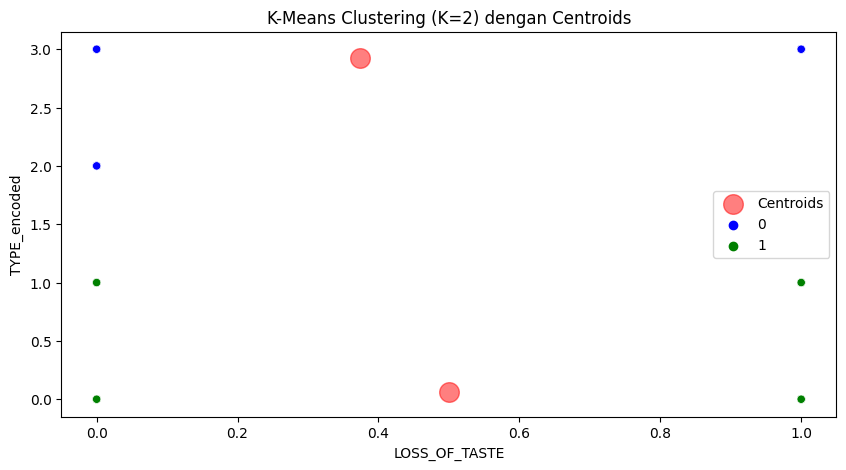

In [110]:
label_encoder = LabelEncoder()
df['TYPE_encoded'] = label_encoder.fit_transform(df['TYPE'])

X = df[["LOSS_OF_TASTE", "TYPE_encoded"]]
K = 2

kmeans = KMeans(n_clusters=K, n_init=10)
kmeans.fit(X)
cluster_labels = kmeans.labels_
df["clusters"] = cluster_labels
centroids = kmeans.cluster_centers_
colors = ["blue", "green"]

plt.figure(figsize=(10, 5))
plt.scatter(centroids[:, 0], centroids[:, 1], alpha=0.5, c='red', s=200, label='Centroids')
sns.scatterplot(data=df, x="LOSS_OF_TASTE", y="TYPE_encoded", hue="clusters", palette=colors)

plt.title(f"K-Means Clustering (K={K}) dengan Centroids")
plt.xlabel("LOSS_OF_TASTE")
plt.ylabel("TYPE_encoded")
plt.legend()
plt.show()

Clustering menggunakan metode K-Means

# B2 EVALUASI CLUSTERING

<h4><b>Tanpa Label</b></h4>

In [112]:
ss_score = silhouette_score(X, cluster_labels)
print(f"Silhouette Score: {ss_score:.2f}")
db_index = davies_bouldin_score(X, cluster_labels)
print(f"Davies-Bouldin Index: {db_index:.2f}")
ch_index = calinski_harabasz_score(X, cluster_labels)
print(f"Calinski-Harabasz Index: {ch_index:.2f}")

Silhouette Score: 0.80
Davies-Bouldin Index: 0.37
Calinski-Harabasz Index: 286098.83


<h4><b>A2.Dengan Label</b></h4>

In [117]:
label_encoder = LabelEncoder()
df['TYPE_encoded'] = label_encoder.fit_transform(df['TYPE'])

X = df[['COUGH', 'TYPE_encoded']]
k = 2

model = KMeans(n_clusters=k)
cluster_labels = model.fit_predict(X)

true_labels = df['TYPE_encoded'].values.flatten()

ari = adjusted_rand_score(true_labels, cluster_labels)
print("Adjusted Rand Score:", ari)


Adjusted Rand Score: 0.8629858721429985


c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<h2><b>B3.Plot Clustering</b></h2>

c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorica

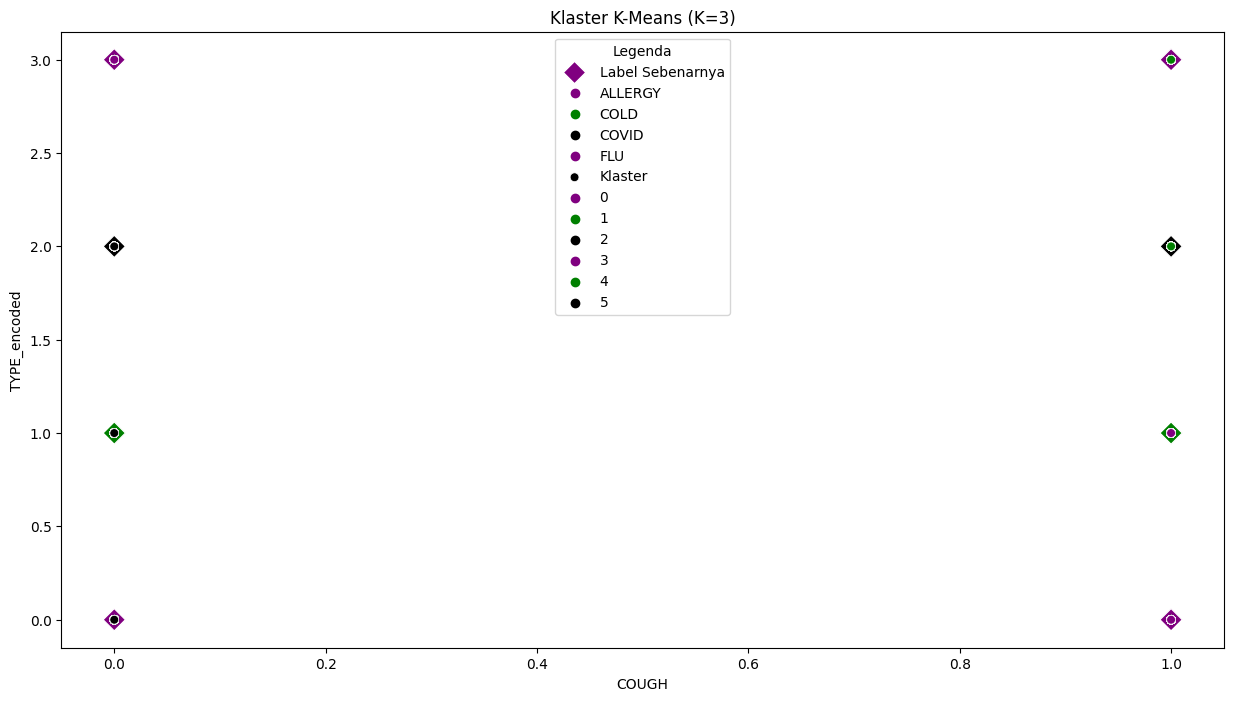

In [130]:
label_encoder = LabelEncoder()
df['TYPE_encoded'] = label_encoder.fit_transform(df['TYPE'])

X = df[['COUGH', 'TYPE_encoded']] 
model = KMeans(n_clusters=k)
cluster_labels = model.fit_predict(X)

pemetaan_klaster = {0: 1, 1: 0, 2: 2}
df["klaster2"] = cluster_labels  
plt.figure(figsize=(15, 8))

warna = ["purple","green","black"]
sns.scatterplot(data=df, x="COUGH", y="TYPE_encoded",
                hue="TYPE", marker="D", s=130, palette=warna, label="Label Sebenarnya")
sns.scatterplot(data=df, x="COUGH", y="TYPE_encoded",
                hue="klaster2", marker="o", s=40, palette=warna, label="Klaster")
plt.title("Klaster K-Means (K=3)")
plt.xlabel("COUGH")
plt.ylabel("TYPE_encoded")
plt.legend(title="Legenda", loc="upper center")
plt.show()